In [2]:
!pip install wordcloud

In [25]:
!pip3 install package_name --user

  Created wheel for package-name: filename=package_name-0.1-py3-none-any.whl size=1272 sha256=3a2d01f9b417bb5de2d7ed8870612330eda08708498d08d5ef533bd41cc8107e
  Stored in directory: c:\users\sxt28\appdata\local\pip\cache\wheels\aa\56\2f\2bf8ec875b1c71660b2692b4aab073132abc78ac076140489b
Successfully built package-name


In [26]:
!pip install --upgrade pip

In [31]:
!pip -V

pip 20.3.1 from c:\users\sxt28\anaconda3\lib\site-packages\pip (python 3.7)



In [33]:
!pip uninstall tensorflow

In [34]:
!pip install tensorflow

  Using cached tensorflow-2.3.1-cp37-cp37m-win_amd64.whl (342.5 MB)


In [32]:
!pip install wrapt --upgrade --ignore-installed

  Using cached wrapt-1.12.1-cp37-none-any.whl


In [14]:
!pip install tensorflow==1.2.0 --ignore-installed

  Could not find a version that satisfies the requirement tensorflow==1.2.0 (from versions: 1.13.0rc1, 1.13.0rc2, 1.13.1, 1.13.2, 1.14.0rc0, 1.14.0rc1, 1.14.0, 1.15.0rc0, 1.15.0rc1, 1.15.0rc2, 1.15.0rc3, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 2.0.0a0, 2.0.0b0, 2.0.0b1, 2.0.0rc0, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.1.0rc0, 2.1.0rc1, 2.1.0rc2, 2.1.0, 2.1.1, 2.1.2, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3)
No matching distribution found for tensorflow==1.2.0


In [7]:
!pip install gensim

In [1]:
import numpy as np
import pandas as pd
import nltk
import string
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from string import punctuation
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
from nltk.corpus import stopwords
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.pipeline import make_pipeline

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
true0 = pd.DataFrame(pd.read_csv('./true.csv'))
fake0 = pd.DataFrame(pd.read_csv('./fake.csv'))

In [4]:
true0.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [5]:
fake0.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [6]:
fake_politics = fake0[fake0.subject.isin(['Government News', 'politics'])]
true_politics = true0[true0.subject == 'politicsNews']

In [7]:
# Filter the news of 2016
fake_politics_2016 = fake_politics[fake_politics['date'].str.contains('2016')]
true_politics_2016 = true_politics[true_politics['date'].str.contains('2016')]

In [8]:
fake1 = fake_politics_2016
true1 = true_politics_2016

In [9]:
fake1['label']=0
true1['label']=1

C:\Users\sxt28\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sxt28\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
news=fake1.append(true1)

In [37]:
news.head()

,title,text,subject,date,label
12023,TRUMP DITCHES PRESS To Make “Last Minute” Surp...,President-elect Donald Trump played a round of...,politics,"Dec 31, 2016",0
12024,"COUNTDOWN TICKER: Obama Leaves Office In…5,4,3...",(function(){ var s=document.createElement('scr...,politics,"Dec 31, 2016",0
12025,BOOM! TOMI LAHREN’S Top Tips For Liberals In 2...,,politics,"Dec 31, 2016",0
12026,"YES, OBAMA…There Is A Magic Wand! [Video]",,politics,"Dec 31, 2016",0
12027,HA! DONALD TRUMP’S Unusual New Year’s Tweet To...,President-elect Donald Trump is throwing a pri...,politics,"Dec 31, 2016",0


In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sxt28\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
#data cleaning

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [40]:
def strip_html(text):
    soup = BeautifulSoup(text,"html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_url(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip().lower())
    return " ".join(final_text)

#Removing punctuation
def remove_punctuation(text):
    pattern = '[’!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+'
    text = re.sub(pattern,'',text)
    return text

#Since 'reuters' is shown in almost every piece of true news, we want to remove it from the true news
def remove_reuters(text):
    if 'reuters' in text.split()[0:5]:
        text = text[text.find('reuters'):]
        text = text.split(' ', 1)[1]
    return text
    

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_url(text)
    text = remove_stopwords(text)
    text = remove_punctuation(text)
    text = remove_reuters(text)
    text.lower()
  
    return text


In [41]:
#Apply function on text and title column
news['text']=news['text'].apply(denoise_text)
news['title']=news['title'].apply(denoise_text)

C:\Users\sxt28\Anaconda3\lib\site-packages\bs4\__init__.py:336: UserWarning: "https://www.youtube.com/watch?v=IioEIUmawRo" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\sxt28\Anaconda3\lib\site-packages\bs4\__init__.py:336: UserWarning: "https://www.youtube.com/watch?v=31MRqr9ydUU" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\sxt28\Anaconda3\lib\site-packages\bs4\__init__.py:336: UserWarning: "https://www.youtube.com/watch?v=wYdX071Nlow" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, an

In [42]:
# drop those empty text data 
news = news[news.text != '']

In [43]:
# Shuffle the news
news = news.sample(frac = 1, random_state = 1)

In [44]:
news.head(10)

,title,text,subject,date,label
9917,mississippi governor signs law allowing armed ...,mississippi governor phil bryant signed gun ri...,politicsNews,"April 15, 2016",1
13107,watch cnn host freak onair “factcheck” proves ...,hangon hangon hangon hangon brooke baldwin des...,politics,"Sep 2, 2016",0
10519,kerry trip cuba rights dialogue canceled us of...,tentative plans us secretary state john kerry ...,politicsNews,"March 4, 2016",1
10945,special report obama gun control advocates sto...,barack obama might seem unlikely investor fire...,politicsNews,"February 5, 2016",1
10495,white house adviser rhodes meet cuban american...,president barack obamas deputy national securi...,politicsNews,"March 4, 2016",1
8137,us lawmakers say afghanistan corruption threat...,us senators questioned state department offici...,politicsNews,"September 15, 2016",1
14256,unhinged radical leftists try storm trumps uta...,utah protest planned organized far left effort...,politics,"Mar 19, 2016",0
13814,five state department rules hillary violated,hillary doubles false claim rules clarified le...,politics,"May 27, 2016",0
14165,witch hunt communist california raids home man...,make mistake it seeing tactics used communist ...,politics,"Apr 6, 2016",0
14448,gag hollywood latinos gush hillary nevada race...,pandering hillary best first black vote meetin...,politics,"Feb 20, 2016",0


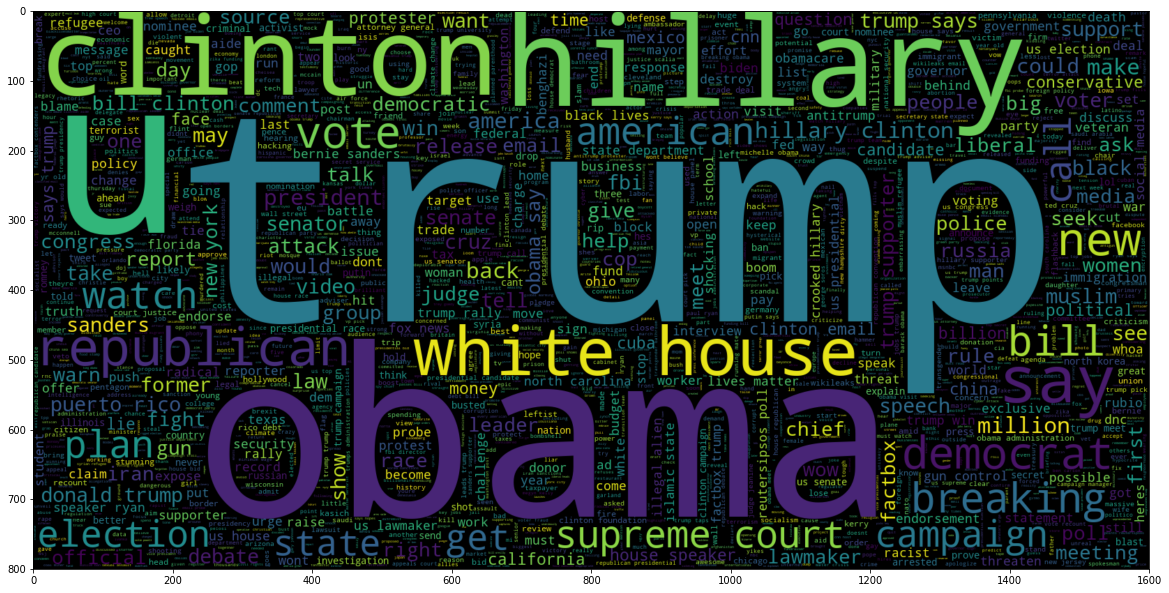

In [45]:
#wordcloud all news based on the titles
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop).generate(" ".join(news.title))
plt.imshow(wc , interpolation = 'bilinear')

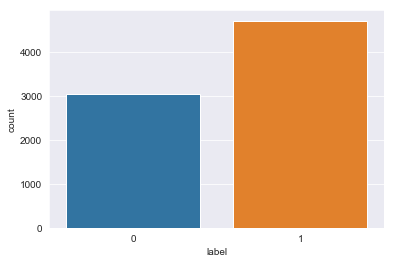

In [46]:
sns.set_style("darkgrid")
sns.countplot(news.label)

In [47]:
# select the title and text data
X = news[['title', 'text']]

In [48]:
# The outcome is always label
Y = news[['label']]

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

In [50]:
# Split the data as two sources: title and text 
x_train_title = x_train['title']
x_train_text = x_train['text']
x_test_title = x_test['title']
x_test_text = x_test['text']

In [51]:
y_train = y_train['label']
y_test = y_test['label']

# 1. Prediction based on Title

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score

In [53]:
# Model 1: Naive Bayes Model with TF-IDF inputs
model1_title = make_pipeline(TfidfVectorizer(), MultinomialNB())
model1_title.fit(x_train_title, y_train)
pred1_title = model1_title.predict(x_test_title)
f1_macro = f1_score(y_test, pred1_title, average = 'macro')
f1_micro = f1_score(y_test, pred1_title, average = 'micro')

print('macroaveraged F1: ', f1_macro)
print('microaveraged F1: ', f1_micro)

macroaveraged F1:  0.9281289373295099
microaveraged F1:  0.9317010309278351


Text(28.6, 0.5, 'predicted label')

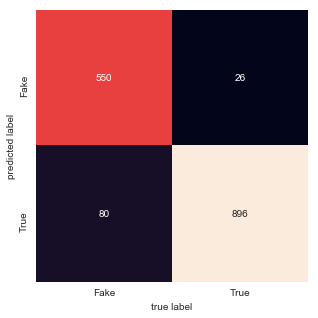

In [54]:
# plot the confusion matrix
mat = confusion_matrix(y_test, pred1_title)
label_name = ['Fake', 'True']
plt.figure(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=label_name, yticklabels=label_name)
plt.xlabel('true label')
plt.ylabel('predicted label')


In [55]:
from sklearn.neural_network import MLPClassifier

In [56]:
# Model 2: Single Layer Neural Network Model with TF-IDF inputs
model2_title = make_pipeline(TfidfVectorizer(), MLPClassifier(hidden_layer_sizes=(50, ), random_state=1, verbose = True))
model2_title.fit(x_train_title, y_train)
pred2_title = model2_title.predict(x_test_title)
f1_macro = f1_score(y_test, pred2_title, average = 'macro')
f1_micro = f1_score(y_test, pred2_title, average = 'micro')

Iteration 1, loss = 0.67931797
Iteration 2, loss = 0.58607968
Iteration 3, loss = 0.45919279
Iteration 4, loss = 0.33990822
Iteration 5, loss = 0.25078905
Iteration 6, loss = 0.18947957
Iteration 7, loss = 0.14758040
Iteration 8, loss = 0.11841614
Iteration 9, loss = 0.09669657
Iteration 10, loss = 0.08061329
Iteration 11, loss = 0.06804653
Iteration 12, loss = 0.05814917
Iteration 13, loss = 0.05024183
Iteration 14, loss = 0.04372418
Iteration 15, loss = 0.03837055
Iteration 16, loss = 0.03390911
Iteration 17, loss = 0.03015030
Iteration 18, loss = 0.02696851
Iteration 19, loss = 0.02423972
Iteration 20, loss = 0.02190843
Iteration 21, loss = 0.01992083
Iteration 22, loss = 0.01814972
Iteration 23, loss = 0.01662708
Iteration 24, loss = 0.01528897
Iteration 25, loss = 0.01409501
Iteration 26, loss = 0.01302000
Iteration 27, loss = 0.01207480
Iteration 28, loss = 0.01121923
Iteration 29, loss = 0.01049916
Iteration 30, loss = 0.00979514
Iteration 31, loss = 0.00917126
Iteration 32, los

In [57]:
print('macroaveraged F1: ', f1_macro)
print('microaveraged F1: ', f1_micro)

macroaveraged F1:  0.9431500606551619
microaveraged F1:  0.9452319587628866


In [58]:
# Model 3: Multi Layer Neural Network Model with TF-IDF inputs
model3_title = make_pipeline(TfidfVectorizer(), MLPClassifier(hidden_layer_sizes=(200,200,200,200, ),random_state=1, verbose = True))
model3_title.fit(x_train_title, y_train)
pred3_title = model3_title.predict(x_test_title)
f1_macro = f1_score(y_test, pred3_title, average = 'macro')
f1_micro = f1_score(y_test, pred3_title, average = 'micro')

Iteration 1, loss = 0.58296919
Iteration 2, loss = 0.10330109
Iteration 3, loss = 0.01375077
Iteration 4, loss = 0.00168248
Iteration 5, loss = 0.00049345
Iteration 6, loss = 0.00030998
Iteration 7, loss = 0.00025794
Iteration 8, loss = 0.00023576
Iteration 9, loss = 0.00022034
Iteration 10, loss = 0.00020969
Iteration 11, loss = 0.00020404
Iteration 12, loss = 0.00020012
Iteration 13, loss = 0.00019695
Iteration 14, loss = 0.00019417
Iteration 15, loss = 0.00019171
Iteration 16, loss = 0.00018949
Iteration 17, loss = 0.00018740
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [59]:
print('macroaveraged F1: ', f1_macro)
print('microaveraged F1: ', f1_micro)

macroaveraged F1:  0.9406242007277541
microaveraged F1:  0.9426546391752577


In [6]:
# Model 4: Single Layer Neural Network Model with embedding inputs

#load word embeddings.

glove_file = datapath('/Users/luanyang/Downloads/stat software/hw/glove.6B.100d.txt')
word2vec_text_file = get_tmpfile("/Users/luanyang/Downloads/stat software/hw/glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_text_file)
model = KeyedVectors.load_word2vec_format(word2vec_text_file)
wv = model.wv

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


In [29]:
# get the embedding of the document 
def calc_doc_embedding(doc, embeddings, embed_size, OOV_embed):
    doc_list = doc.split()
    doc_embed = np.zeros(embed_size)
    length = 0
    for word in doc_list:
        if word in embeddings:
            doc_embed = doc_embed + embeddings[word]
            length += 1
        else:
            if word in OOV_embed:
                doc_embed = doc_embed + OOV_embed[word]
                length += 1
            else:
                OOV_embed[word] = np.random.rand(embed_size)
                doc_embed = doc_embed + OOV_embed[word]
                length += 1
    doc_embed = doc_embed / length
    return doc_embed

x_train_title_embed = np.vstack([calc_doc_embedding(doc, wv, 100, {}) for doc in x_train_title])
x_test_title_embed = np.vstack([calc_doc_embedding(doc, wv, 100, {}) for doc in x_test_title])

In [32]:
model4_title = MLPClassifier(hidden_layer_sizes=(50), max_iter=500,verbose=True)
model4_title.fit(x_train_title_embed, y_train)
pred4_title = model4_title.predict(x_test_title_embed)
f1_macro = f1_score(y_test, pred4_title, average = 'macro')
f1_micro = f1_score(y_test, pred4_title, average = 'micro')

print('macroaveraged F1: ', f1_macro)
print('microaveraged F1: ', f1_micro)

Iteration 1, loss = 0.58240823
Iteration 2, loss = 0.43364058
Iteration 3, loss = 0.36080482
Iteration 4, loss = 0.32935994
Iteration 5, loss = 0.31312222
Iteration 6, loss = 0.30143114
Iteration 7, loss = 0.29438867
Iteration 8, loss = 0.28926257
Iteration 9, loss = 0.28219801
Iteration 10, loss = 0.27923059
Iteration 11, loss = 0.27466570
Iteration 12, loss = 0.27034751
Iteration 13, loss = 0.26782850
Iteration 14, loss = 0.26495301
Iteration 15, loss = 0.26785898
Iteration 16, loss = 0.25964107
Iteration 17, loss = 0.25996555
Iteration 18, loss = 0.26102444
Iteration 19, loss = 0.25688176
Iteration 20, loss = 0.25260325
Iteration 21, loss = 0.25139157
Iteration 22, loss = 0.24935269
Iteration 23, loss = 0.24818592
Iteration 24, loss = 0.24648592
Iteration 25, loss = 0.24446129
Iteration 26, loss = 0.24863019
Iteration 27, loss = 0.24184641
Iteration 28, loss = 0.24146642
Iteration 29, loss = 0.23977128
Iteration 30, loss = 0.23789871
Iteration 31, loss = 0.23615175
Iteration 32, los

Iteration 257, loss = 0.05328545
Iteration 258, loss = 0.05251433
Iteration 259, loss = 0.05478980
Iteration 260, loss = 0.05257781
Iteration 261, loss = 0.05191913
Iteration 262, loss = 0.05117950
Iteration 263, loss = 0.05113503
Iteration 264, loss = 0.06291424
Iteration 265, loss = 0.05410274
Iteration 266, loss = 0.05134789
Iteration 267, loss = 0.05507194
Iteration 268, loss = 0.05193746
Iteration 269, loss = 0.05861947
Iteration 270, loss = 0.05038057
Iteration 271, loss = 0.04914159
Iteration 272, loss = 0.04845014
Iteration 273, loss = 0.04955019
Iteration 274, loss = 0.04946165
Iteration 275, loss = 0.04753221
Iteration 276, loss = 0.04718907
Iteration 277, loss = 0.04723466
Iteration 278, loss = 0.04850400
Iteration 279, loss = 0.04656421
Iteration 280, loss = 0.04632161
Iteration 281, loss = 0.04739363
Iteration 282, loss = 0.04586521
Iteration 283, loss = 0.04500035
Iteration 284, loss = 0.04541116
Iteration 285, loss = 0.04449798
Iteration 286, loss = 0.04462909
Iteration 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [34]:
# Model 5: Multi Layer Neural Network Model with embedding inputs

model5_title = MLPClassifier(hidden_layer_sizes=(200,200,200,200), max_iter=500,verbose=True)
model5_title.fit(x_train_title_embed, y_train)
pred5_title = model5_title.predict(x_test_title_embed)
f1_macro = f1_score(y_test, pred5_title, average = 'macro')
f1_micro = f1_score(y_test, pred5_title, average = 'micro')

print('macroaveraged F1: ', f1_macro)
print('microaveraged F1: ', f1_micro)


Iteration 1, loss = 0.43867443
Iteration 2, loss = 0.28572818
Iteration 3, loss = 0.26469737
Iteration 4, loss = 0.23818594
Iteration 5, loss = 0.21142058
Iteration 6, loss = 0.19659212
Iteration 7, loss = 0.17938339
Iteration 8, loss = 0.13868079
Iteration 9, loss = 0.11939433
Iteration 10, loss = 0.16910628
Iteration 11, loss = 0.09250540
Iteration 12, loss = 0.07245877
Iteration 13, loss = 0.05344127
Iteration 14, loss = 0.05042001
Iteration 15, loss = 0.12108763
Iteration 16, loss = 0.05357355
Iteration 17, loss = 0.07801827
Iteration 18, loss = 0.03535940
Iteration 19, loss = 0.01507647
Iteration 20, loss = 0.00810212
Iteration 21, loss = 0.00469934
Iteration 22, loss = 0.00358279
Iteration 23, loss = 0.00187718
Iteration 24, loss = 0.00099579
Iteration 25, loss = 0.00066756
Iteration 26, loss = 0.00050883
Iteration 27, loss = 0.00043247
Iteration 28, loss = 0.00038547
Iteration 29, loss = 0.00035250
Iteration 30, loss = 0.00032970
Iteration 31, loss = 0.00031359
Iteration 32, los

In [197]:
#Model 6 : RNN with embeddings input

#Convert text to vectors, our classifier only takes numerical data.
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        normalized.append(i)
    return normalized

x_train_title_rnn = normalize(x_train_title)
x_test_title_rnn = normalize(x_test_title)




In [198]:
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train_title_rnn)

# tokenize the text into vectors 
x_train_title_rnn = tokenizer.texts_to_sequences(x_train_title_rnn)
x_test_title_rnn = tokenizer.texts_to_sequences(x_test_title_rnn)

#Apply padding so we have the same length for each article
x_train_title_rnn = tf.keras.preprocessing.sequence.pad_sequences(x_train_title_rnn, padding='post', maxlen=256)
x_test_title_rnn = tf.keras.preprocessing.sequence.pad_sequences(x_test_title_rnn, padding='post', maxlen=256)




In [199]:
#Build RNN
model6 = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, None, 128)         49664     
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 32)                18560     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 390,401
Trainable params: 390,401
Non-trainable params: 0
________________________________________________

In [200]:
# early stop when the validation loss no longer improve.
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model6.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

model6_title = model6.fit(x_train_title_rnn, y_train, epochs=5,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/5
187/187 [==============================] - 34s 184ms/step - loss: 0.6769 - accuracy: 0.4201 - val_loss: 0.6388 - val_accuracy: 0.7391
Epoch 2/5
187/187 [==============================] - 31s 168ms/step - loss: 0.5526 - accuracy: 0.7448 - val_loss: 0.4255 - val_accuracy: 0.8631
Epoch 3/5
187/187 [==============================] - 30s 161ms/step - loss: 0.2659 - accuracy: 0.9271 - val_loss: 0.2185 - val_accuracy: 0.9324
Epoch 4/5
187/187 [==============================] - 30s 163ms/step - loss: 0.1415 - accuracy: 0.9570 - val_loss: 0.2087 - val_accuracy: 0.9259
Epoch 5/5
187/187 [==============================] - 30s 161ms/step - loss: 0.0997 - accuracy: 0.9726 - val_loss: 0.2307 - val_accuracy: 0.9291


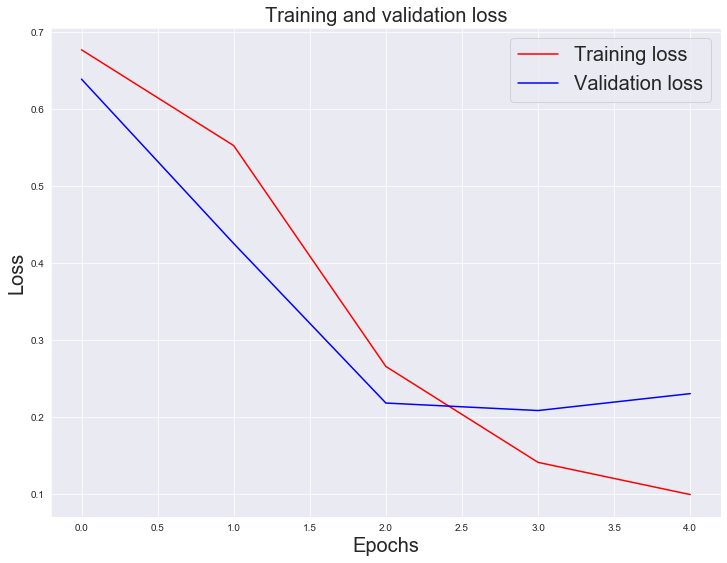

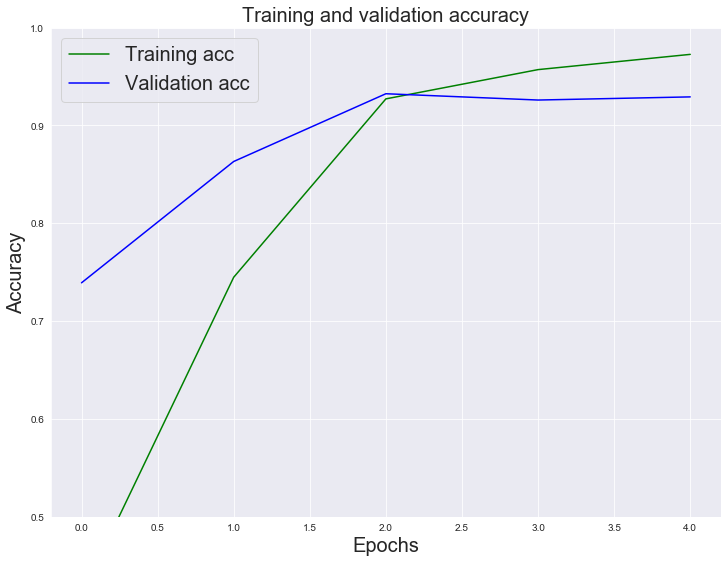

In [203]:
#Visualize our training over time
history_dict = model6_title.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = model6_title.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [210]:
#Evaluate the testing set
pred = model6.predict(x_test_title_rnn)
pred6_title = []

for i in pred:
    if i >= 0.5:
        pred6_title.append(1)
    else:
        pred6_title.append(0) 


f1_macro = f1_score(y_test, pred6_title, average = 'macro')
f1_micro = f1_score(y_test, pred6_title, average = 'micro')

print('macroaveraged F1: ', f1_macro)
print('microaveraged F1: ', f1_micro)


macroaveraged F1:  0.9095164722926634
microaveraged F1:  0.9143041237113402


# 2. Prediction based on Text

In [32]:
# Model 1: Naive Bayes Model with TF-IDF inputs
model1_text = make_pipeline(TfidfVectorizer(), MultinomialNB())
model1_text.fit(x_train_text, y_train)
pred1_text = model1_text.predict(x_test_text)
f1_macro = f1_score(y_test, pred1_text, average = 'macro')
f1_micro = f1_score(y_test, pred1_text, average = 'micro')

print('macroaveraged F1: ', f1_macro)
print('microaveraged F1: ', f1_micro)

macroaveraged F1:  0.6561258928365161
microaveraged F1:  0.7280927835051546


In [361]:
# Model 2: Single Layer Neural Network Model with TF-IDF inputs
model2_text = make_pipeline(TfidfVectorizer(), MLPClassifier(hidden_layer_sizes=(50, ), random_state=1, verbose = True))
model2_text.fit(x_train_text, y_train)
pred2_text = model2_text.predict(x_test_text)
f1_macro = f1_score(y_test, pred2_text, average = 'macro')
f1_micro = f1_score(y_test, pred2_text, average = 'micro')

print('macroaveraged F1: ', f1_macro)
print('microaveraged F1: ', f1_micro)

Iteration 1, loss = 0.58245266
Iteration 2, loss = 0.38159907
Iteration 3, loss = 0.24361029
Iteration 4, loss = 0.15631934
Iteration 5, loss = 0.10512789
Iteration 6, loss = 0.07404984
Iteration 7, loss = 0.05428268
Iteration 8, loss = 0.04118252
Iteration 9, loss = 0.03232138
Iteration 10, loss = 0.02598328
Iteration 11, loss = 0.02135815
Iteration 12, loss = 0.01792994
Iteration 13, loss = 0.01531616
Iteration 14, loss = 0.01326387
Iteration 15, loss = 0.01166071
Iteration 16, loss = 0.01035442
Iteration 17, loss = 0.00928919
Iteration 18, loss = 0.00839350
Iteration 19, loss = 0.00764524
Iteration 20, loss = 0.00701869
Iteration 21, loss = 0.00649077
Iteration 22, loss = 0.00603846
Iteration 23, loss = 0.00564599
Iteration 24, loss = 0.00530277
Iteration 25, loss = 0.00499987
Iteration 26, loss = 0.00473181
Iteration 27, loss = 0.00449091
Iteration 28, loss = 0.00427638
Iteration 29, loss = 0.00408811
Iteration 30, loss = 0.00391097
Iteration 31, loss = 0.00375560
Iteration 32, los

In [ ]:
# Model 3: Single Layer Neural Network Model with TF-IDF inputs
model3_text = make_pipeline(TfidfVectorizer(), MLPClassifier(hidden_layer_sizes=(100,100,100, ), random_state=1, verbose = True))
model3_text.fit(x_train_text, y_train)
pred3_text = model3_text.predict(x_test_text)
f1_macro = f1_score(y_test, pred3_text, average = 'macro')
f1_micro = f1_score(y_test, pred3_text, average = 'micro')

print('macroaveraged F1: ', f1_macro)
print('microaveraged F1: ', f1_micro)

In [36]:
# Model 4 : Single Layer Neural Network Model with embeddings inputs

x_train_text_embed = np.vstack([calc_doc_embedding(doc, wv, 100, {}) for doc in x_train_text])
x_test_text_embed = np.vstack([calc_doc_embedding(doc, wv, 100, {}) for doc in x_test_text])

model4_text = MLPClassifier(hidden_layer_sizes=(50), max_iter=500,verbose=True)
model4_text.fit(x_train_text_embed, y_train)
pred4_text = model4_text.predict(x_test_text_embed)
f1_macro = f1_score(y_test, pred4_text, average = 'macro')
f1_micro = f1_score(y_test, pred4_text, average = 'micro')

print('macroaveraged F1: ', f1_macro)
print('microaveraged F1: ', f1_micro)


Iteration 1, loss = 0.60542537
Iteration 2, loss = 0.49323766
Iteration 3, loss = 0.41703739
Iteration 4, loss = 0.37647224
Iteration 5, loss = 0.35040595
Iteration 6, loss = 0.33160358
Iteration 7, loss = 0.31818626
Iteration 8, loss = 0.30537153
Iteration 9, loss = 0.29384801
Iteration 10, loss = 0.28384882
Iteration 11, loss = 0.27411607
Iteration 12, loss = 0.26693144
Iteration 13, loss = 0.26252214
Iteration 14, loss = 0.25524170
Iteration 15, loss = 0.24896017
Iteration 16, loss = 0.24469202
Iteration 17, loss = 0.24030852
Iteration 18, loss = 0.23732799
Iteration 19, loss = 0.23257086
Iteration 20, loss = 0.22884364
Iteration 21, loss = 0.22629497
Iteration 22, loss = 0.22274421
Iteration 23, loss = 0.22006962
Iteration 24, loss = 0.21720560
Iteration 25, loss = 0.21506608
Iteration 26, loss = 0.21720732
Iteration 27, loss = 0.21314863
Iteration 28, loss = 0.21098659
Iteration 29, loss = 0.21103437
Iteration 30, loss = 0.20574992
Iteration 31, loss = 0.20476759
Iteration 32, los

Iteration 259, loss = 0.12480679
Iteration 260, loss = 0.12633637
Iteration 261, loss = 0.12550823
Iteration 262, loss = 0.12438284
Iteration 263, loss = 0.13025998
Iteration 264, loss = 0.12546868
Iteration 265, loss = 0.12378483
Iteration 266, loss = 0.12424954
Iteration 267, loss = 0.12417340
Iteration 268, loss = 0.12640620
Iteration 269, loss = 0.12421539
Iteration 270, loss = 0.13060699
Iteration 271, loss = 0.12892556
Iteration 272, loss = 0.12751055
Iteration 273, loss = 0.13485806
Iteration 274, loss = 0.14546337
Iteration 275, loss = 0.12757474
Iteration 276, loss = 0.12269446
Iteration 277, loss = 0.12204155
Iteration 278, loss = 0.12455782
Iteration 279, loss = 0.12197658
Iteration 280, loss = 0.12279087
Iteration 281, loss = 0.12169142
Iteration 282, loss = 0.12097517
Iteration 283, loss = 0.12111554
Iteration 284, loss = 0.12339320
Iteration 285, loss = 0.13310529
Iteration 286, loss = 0.12350921
Iteration 287, loss = 0.12209177
Iteration 288, loss = 0.12065509
Iteration 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [33]:
model4_text = MLPClassifier(hidden_layer_sizes=(50), max_iter=500,verbose=True)
model4_text.fit(x_train_title_embed, y_train)
pred4_text = model4_text.predict(x_test_title_embed)
f1_macro = f1_score(y_test, pred4_text, average = 'macro')
f1_micro = f1_score(y_test, pred4_text, average = 'micro')

print('macroaveraged F1: ', f1_macro)
print('microaveraged F1: ', f1_micro)

Iteration 1, loss = 0.45346902
Iteration 2, loss = 0.18684582
Iteration 3, loss = 0.13242360
Iteration 4, loss = 0.11773486
Iteration 5, loss = 0.11030411
Iteration 6, loss = 0.10665651
Iteration 7, loss = 0.10264938
Iteration 8, loss = 0.09911184
Iteration 9, loss = 0.09561356
Iteration 10, loss = 0.09295498
Iteration 11, loss = 0.08940242
Iteration 12, loss = 0.08616527
Iteration 13, loss = 0.08416096
Iteration 14, loss = 0.08105542
Iteration 15, loss = 0.07904139
Iteration 16, loss = 0.07615224
Iteration 17, loss = 0.07689168
Iteration 18, loss = 0.07254248
Iteration 19, loss = 0.07035179
Iteration 20, loss = 0.06932115
Iteration 21, loss = 0.06751005
Iteration 22, loss = 0.06626523
Iteration 23, loss = 0.06482150
Iteration 24, loss = 0.06312428
Iteration 25, loss = 0.06264584
Iteration 26, loss = 0.06188250
Iteration 27, loss = 0.06093994
Iteration 28, loss = 0.05974166
Iteration 29, loss = 0.06025048
Iteration 30, loss = 0.05825438
Iteration 31, loss = 0.05741228
Iteration 32, los

Iteration 254, loss = 0.01247234
Iteration 255, loss = 0.01188247
Iteration 256, loss = 0.01182116
Iteration 257, loss = 0.01192023
Iteration 258, loss = 0.01569866
Iteration 259, loss = 0.01181785
Iteration 260, loss = 0.01227927
Iteration 261, loss = 0.01174894
Iteration 262, loss = 0.01345253
Iteration 263, loss = 0.01126353
Iteration 264, loss = 0.01113984
Iteration 265, loss = 0.01139697
Iteration 266, loss = 0.01112160
Iteration 267, loss = 0.01113171
Iteration 268, loss = 0.01060948
Iteration 269, loss = 0.01099326
Iteration 270, loss = 0.01047369
Iteration 271, loss = 0.01084685
Iteration 272, loss = 0.01077335
Iteration 273, loss = 0.01245124
Iteration 274, loss = 0.01057491
Iteration 275, loss = 0.01082479
Iteration 276, loss = 0.01007891
Iteration 277, loss = 0.01003272
Iteration 278, loss = 0.00978265
Iteration 279, loss = 0.01085988
Iteration 280, loss = 0.01019456
Iteration 281, loss = 0.01008776
Iteration 282, loss = 0.01005390
Iteration 283, loss = 0.00958095
Iteration 

In [212]:
# Model 5 : Multi-Layer Neural Network Model with embeddings inputs
model5_text = MLPClassifier(hidden_layer_sizes=(200,200,200,200), max_iter=500,verbose=True)
model5_text.fit(x_train_text_embed, y_train)
pred5_text = model5_text.predict(x_test_text_embed)
f1_macro = f1_score(y_test, pred5_text, average = 'macro')
f1_micro = f1_score(y_test, pred5_text, average = 'micro')

print('macroaveraged F1: ', f1_macro)
print('microaveraged F1: ', f1_micro)

Iteration 1, loss = 0.44891992
Iteration 2, loss = 0.26565807
Iteration 3, loss = 0.22952722
Iteration 4, loss = 0.26652848
Iteration 5, loss = 0.19806711
Iteration 6, loss = 0.18446157
Iteration 7, loss = 0.17627452
Iteration 8, loss = 0.16806579
Iteration 9, loss = 0.16137054
Iteration 10, loss = 0.19634832
Iteration 11, loss = 0.16266448
Iteration 12, loss = 0.14027615
Iteration 13, loss = 0.14143438
Iteration 14, loss = 0.13010640
Iteration 15, loss = 0.24239487
Iteration 16, loss = 0.14701312
Iteration 17, loss = 0.20250597
Iteration 18, loss = 0.13654534
Iteration 19, loss = 0.12110979
Iteration 20, loss = 0.10856824
Iteration 21, loss = 0.11055048
Iteration 22, loss = 0.10910035
Iteration 23, loss = 0.09318473
Iteration 24, loss = 0.13102677
Iteration 25, loss = 0.10745294
Iteration 26, loss = 0.08523031
Iteration 27, loss = 0.08356243
Iteration 28, loss = 0.07314881
Iteration 29, loss = 0.08001202
Iteration 30, loss = 0.07038282
Iteration 31, loss = 0.06455897
Iteration 32, los

In [214]:
#Model 6 : RNN with embeddings input


#Convert text to vectors, our classifier only takes numerical data.
x_train_text_rnn = normalize(x_train_text)
x_test_text_rnn = normalize(x_test_text)

In [215]:
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train_text_rnn)

# tokenize the text into vectors 
x_train_text_rnn = tokenizer.texts_to_sequences(x_train_text_rnn)
x_test_text_rnn = tokenizer.texts_to_sequences(x_test_text_rnn)

#Apply padding so we have the same length for each article
x_train_text_rnn = tf.keras.preprocessing.sequence.pad_sequences(x_train_text_rnn, padding='post', maxlen=256)
x_test_text_rnn = tf.keras.preprocessing.sequence.pad_sequences(x_test_text_rnn, padding='post', maxlen=256)


In [217]:
# early stop when the validation loss no longer improve.
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model6.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

model6_text = model6.fit(x_train_text_rnn, y_train, epochs=5,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/10
187/187 [==============================] - 38s 204ms/step - loss: 0.1485 - accuracy: 0.9540 - val_loss: 0.2203 - val_accuracy: 0.9163
Epoch 2/10
187/187 [==============================] - 31s 164ms/step - loss: 0.1041 - accuracy: 0.9708 - val_loss: 0.2175 - val_accuracy: 0.9211
Epoch 3/10
187/187 [==============================] - 31s 165ms/step - loss: 0.0711 - accuracy: 0.9823 - val_loss: 0.2165 - val_accuracy: 0.9291
Epoch 4/10
187/187 [==============================] - 31s 166ms/step - loss: 0.0593 - accuracy: 0.9875 - val_loss: 0.2199 - val_accuracy: 0.9291
Epoch 5/10
187/187 [==============================] - 37s 195ms/step - loss: 0.0493 - accuracy: 0.9910 - val_loss: 0.2549 - val_accuracy: 0.9356


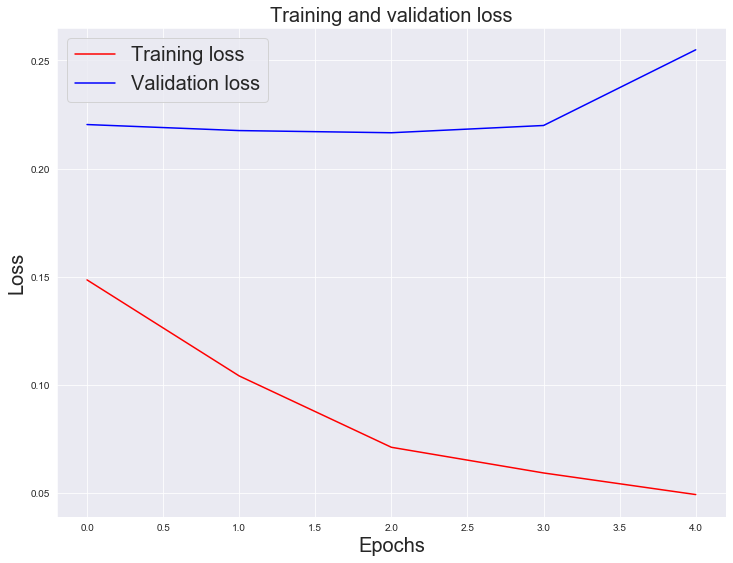

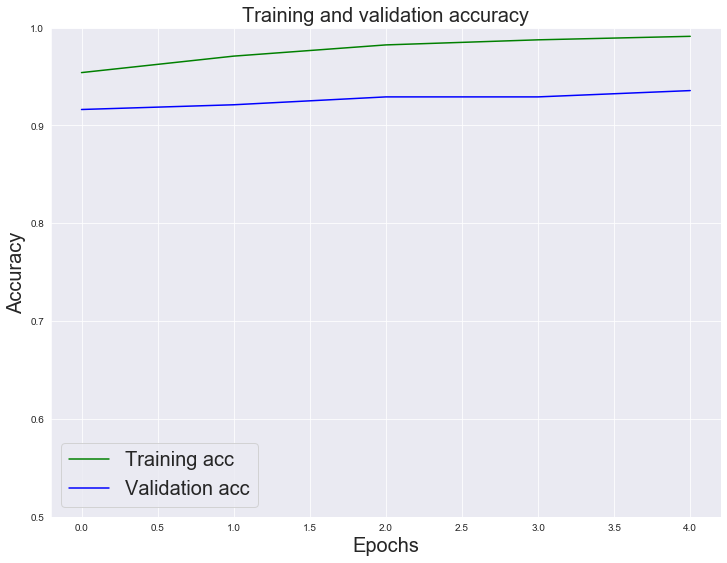

In [218]:
#Visualize our training over time
history_dict = model6_text.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = model6_text.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [219]:
#Evaluate the testing set
pred = model6.predict(x_test_text_rnn)
pred6_text = []

for i in pred:
    if i >= 0.5:
        pred6_text.append(1)
    else:
        pred6_text.append(0) 


f1_macro = f1_score(y_test, pred6_text, average = 'macro')
f1_micro = f1_score(y_test, pred6_text, average = 'micro')

print('macroaveraged F1: ', f1_macro)
print('microaveraged F1: ', f1_micro)

macroaveraged F1:  0.9040062145785674
microaveraged F1:  0.907860824742268
